In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

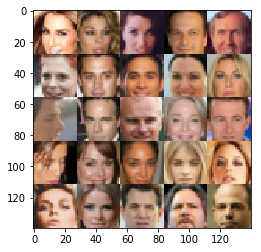

In [2]:
show_n_images = 25

%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot
import numpy as np

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))


In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

epochs = 20
batch_size = 200
noise_factor = 0.5

In [5]:
inputs_ = tf.placeholder(tf.float32, (batch_size, 28, 28, 3), name='inputs')
targets_ = tf.placeholder(tf.float32, (batch_size, 28, 28, 3), name='targets')

### Encoder
conv1 = tf.layers.conv2d(inputs_, 32, (3,3),padding='same', activation=tf.nn.relu)
# Now 28x28x32
maxpool1 = tf.layers.max_pooling2d(conv1, (2,2), (2,2), padding='same')
# Now 14x14x32
conv2 = tf.layers.conv2d(maxpool1, 32, (3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x32
maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')
# Now 7x7x32
conv3 = tf.layers.conv2d(maxpool2, 16, (3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x16
encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')
# Now 4x4x16

### Decoder
upsample1 = tf.image.resize_nearest_neighbor(encoded, (7,7))
# Now 7x7x16
conv4 = tf.layers.conv2d(upsample1, 16, (3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x16
upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
# Now 14x14x16
conv5 = tf.layers.conv2d(upsample2, 32, (3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x32
upsample3 = tf.image.resize_nearest_neighbor(conv5, (28,28))
# Now 28x28x32
conv6 = tf.layers.conv2d(upsample3, 32, (3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x32

logits = tf.layers.conv2d(conv6, 3, (3,3), padding='same', activation=None)
#Now 28x28x3

decoded = tf.nn.sigmoid(logits, name='decoded')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

In [6]:
sess = tf.Session()

In [11]:
celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))



In [13]:

sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for batch_images in celeba_dataset.get_batches(batch_size):
        #print(batch_images.shape)
        #imgs = batch[0].reshape((-1, 28, 28, 3))
        batch_images = batch_images/255;
        noisy_imgs = batch_images + noise_factor * np.random.randn(*batch_images.shape)
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: noisy_imgs,targets_: batch_images})

        print("Epoch: {}/{}...".format(e+1, epochs),"Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6830
Epoch: 1/20... Training loss: 0.6490
Epoch: 1/20... Training loss: 0.5976
Epoch: 1/20... Training loss: 0.5297
Epoch: 1/20... Training loss: 0.4458
Epoch: 1/20... Training loss: 0.3499
Epoch: 1/20... Training loss: 0.2501
Epoch: 1/20... Training loss: 0.1554
Epoch: 1/20... Training loss: 0.0841
Epoch: 1/20... Training loss: 0.0432
Epoch: 1/20... Training loss: 0.0225
Epoch: 1/20... Training loss: 0.0116
Epoch: 1/20... Training loss: 0.0055
Epoch: 1/20... Training loss: 0.0014
Epoch: 1/20... Training loss: 0.0008
Epoch: 1/20... Training loss: -0.0015
Epoch: 1/20... Training loss: -0.0048
Epoch: 1/20... Training loss: -0.0029
Epoch: 1/20... Training loss: -0.0043


KeyboardInterrupt: 